### This notebook is used to process the big riblet runs, consolidate all the data/graphs into one notebook

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import string

In [222]:
def collate_all_dataframes(results_directory, delta_t, t_max):
    '''
    for the alpha over time data, need to collate all the individual dataframes into one master one
    '''
    
    t_vals = np.arange(delta_t, t_max+delta_t, delta_t)
    dataframe_list = [] #empty list to store dataframes
    #print(t_vals.size)
    for i in range(t_vals.size):
        t_string = "{:.1f}".format(t_vals[i])
        
        df = pd.read_csv(results_directory+"alpha_data-t="+t_string+".csv")
        df['t'] = t_vals[i]
        dataframe_list.append(df)
        
    master_dataframe = pd.concat(dataframe_list ,ignore_index=True) #collate all the individual dataframes together
    master_dataframe['alpha_normalised'] = master_dataframe['alpha.biofilm']/np.amax(master_dataframe['alpha.biofilm'])
    #master_dataframe['sd'] = 2
    return master_dataframe

In [223]:
delta_t = 0.2 #timestep of sampled data
t_max = 20.

In [224]:
parallelFlow_14microns_drag = pd.read_csv("riblet_data/integral_results_parallel_14microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
parallelFlow_28microns_drag = pd.read_csv("riblet_data/integral_results_parallel_28microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
parallelFlow_50microns_drag = pd.read_csv("riblet_data/integral_results_parallel_50microns/drag_over_time.csv").rename(columns=lambda x: x.strip())

angle45Flow_14microns_drag = pd.read_csv("riblet_data/integral_results_45deg_14microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
angle45Flow_28microns_drag = pd.read_csv("riblet_data/integral_results_45deg_28microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
angle45Flow_50microns_drag = pd.read_csv("riblet_data/integral_results_45deg_50microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
#use the magnitude of the total force to work out the drag
angle45Flow_14microns_drag['F_total'] = np.sqrt(angle45Flow_14microns_drag['F_x']**2 + angle45Flow_14microns_drag['F_z']**2)
angle45Flow_28microns_drag['F_total'] = np.sqrt(angle45Flow_28microns_drag['F_x']**2 + angle45Flow_28microns_drag['F_z']**2)
angle45Flow_50microns_drag['F_total'] = np.sqrt(angle45Flow_50microns_drag['F_x']**2 + angle45Flow_50microns_drag['F_z']**2)

perpendicularFlow_14microns_drag = pd.read_csv("riblet_data/integral_results_perpendicular_14microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
perpendicularFlow_28microns_drag = pd.read_csv("riblet_data/integral_results_perpendicular_28microns/drag_over_time.csv").rename(columns=lambda x: x.strip())
perpendicularFlow_50microns_drag = pd.read_csv("riblet_data/integral_results_perpendicular_50microns/drag_over_time.csv").rename(columns=lambda x: x.strip())

In [225]:
bf_thickness_labels = ["14 $\mu$m", "28 $\mu$m", "50 $\mu$m"]
drag_angle_labels = ["$0^\degree$", "$45^\degree$", "$90^\degree$"]
parallelDrag_key = "F_z"
angle45Drag_key = "F_total"
perpendicularDrag_key = "F_x"

In [226]:
#group the drag dataframes together by flow direction
#each entry is a tuple containing the dataframe and the key needed for the relevant drag entry
dragDataframes_parallelFlow = [(parallelFlow_14microns_drag, parallelDrag_key), (parallelFlow_28microns_drag, parallelDrag_key), (parallelFlow_50microns_drag, parallelDrag_key)]
dragDataframes_angle45Flow = [(angle45Flow_14microns_drag, angle45Drag_key), (angle45Flow_28microns_drag, angle45Drag_key), (angle45Flow_50microns_drag, angle45Drag_key)]
dragDataframes_perpendicularFlow = [(perpendicularFlow_14microns_drag, perpendicularDrag_key), (perpendicularFlow_28microns_drag, perpendicularDrag_key), (perpendicularFlow_50microns_drag, perpendicularDrag_key)]

#group the drag dataframes together by biofilm thickness
#each entry is a tuple containing the dataframe and the key needed for the relevant drag entry
dragDataFrames_14microns = [(parallelFlow_14microns_drag, parallelDrag_key), (angle45Flow_14microns_drag, angle45Drag_key), (perpendicularFlow_14microns_drag, perpendicularDrag_key)]
dragDataFrames_28microns = [(parallelFlow_28microns_drag, parallelDrag_key), (angle45Flow_28microns_drag, angle45Drag_key), (perpendicularFlow_28microns_drag, perpendicularDrag_key)]
dragDataFrames_50microns = [(parallelFlow_50microns_drag, parallelDrag_key), (angle45Flow_50microns_drag, angle45Drag_key), (perpendicularFlow_50microns_drag, perpendicularDrag_key)]

In [227]:
parallelFlow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_14microns/", delta_t, t_max)
parallelFlow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_28microns/", delta_t, t_max)
parallelFlow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_parallel_50microns/", delta_t, t_max)

angle45Flow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_14microns/", delta_t, t_max)
angle45Flow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_28microns/", delta_t, t_max)
angle45Flow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_45deg_50microns/", delta_t, t_max)

perpendicularFlow_14microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_14microns/", delta_t, t_max)
perpendicularFlow_28microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_28microns/", delta_t, t_max)
perpendicularFlow_50microns_alpha = collate_all_dataframes("riblet_data/alpha_data_perpendicular_50microns/", delta_t, t_max)

#parallelFlow_14microns_alpha

In [228]:
#group the biofilm dataframes together by flow direction
alphaDataframes_parallelFlow = [parallelFlow_14microns_alpha, parallelFlow_28microns_alpha, parallelFlow_50microns_alpha]
alphaDataframes_angle45Flow = [angle45Flow_14microns_alpha, angle45Flow_28microns_alpha, angle45Flow_50microns_alpha]
alphaDataframes_perpendicularFlow = [perpendicularFlow_14microns_alpha, perpendicularFlow_28microns_alpha, perpendicularFlow_50microns_alpha]

#group the biofilm dataframes together by biofilm thickness
alphaDataFrames_14microns = [parallelFlow_14microns_alpha, angle45Flow_14microns_alpha, perpendicularFlow_14microns_alpha]
alphaDataFrames_28microns = [parallelFlow_28microns_alpha, angle45Flow_28microns_alpha, perpendicularFlow_28microns_alpha]
alphaDataFrames_50microns = [parallelFlow_50microns_alpha, angle45Flow_50microns_alpha, perpendicularFlow_50microns_alpha]

In [229]:
def plot3x1DragcomparisonPlots(df_group1, df_group2, df_group3, label_list, title_list, filename):
    '''
    makes a 3x1 subplot plot. each subplot contains 3 lines, with a different variable on each subplot
    
    e.g., all the drags for each bf thickness, parallel flow on one subplot, then 45 deg flow on the next subplot, then perpendicular on last one.
    
    '''
    
    fig, axs = plt.subplots(1,3, dpi=220, sharey=True)
    fig.set_size_inches(7,3)
    
    labelSize=12
    titleSize=14
    
    
    df_group_list = [df_group1, df_group2, df_group3]
    letters = list(string.ascii_lowercase)[:len(df_group_list)] #letters used for labelling subplots
    
    for ax, df_group_and_key, title, letter in zip(axs.flat, df_group_list, title_list, letters):
        
        for df, df_key, label in zip(*zip(*df_group_and_key), label_list):
            
            ax.plot(df["t"], df[df_key], label=label, lw=2.2)
            
            ax.set_title(title, fontsize=titleSize)
            ax.set_ylabel("Drag (N$\\times 10^{-7}$)", fontsize=labelSize)
            ax.set_xlabel("time (s)", fontsize=labelSize)
            ax.text(0.825, 0.92, "("+letter+")", transform=ax.transAxes, fontsize=14)
            
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)
            
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles[::-1], labels[::-1], fontsize=8.5, loc="lower right")
            ax.label_outer()
    
    plt.subplots_adjust(wspace=0.1)

    plt.savefig("riblet_plots/"+filename+".pdf", bbox_inches="tight")
    plt.show()
    

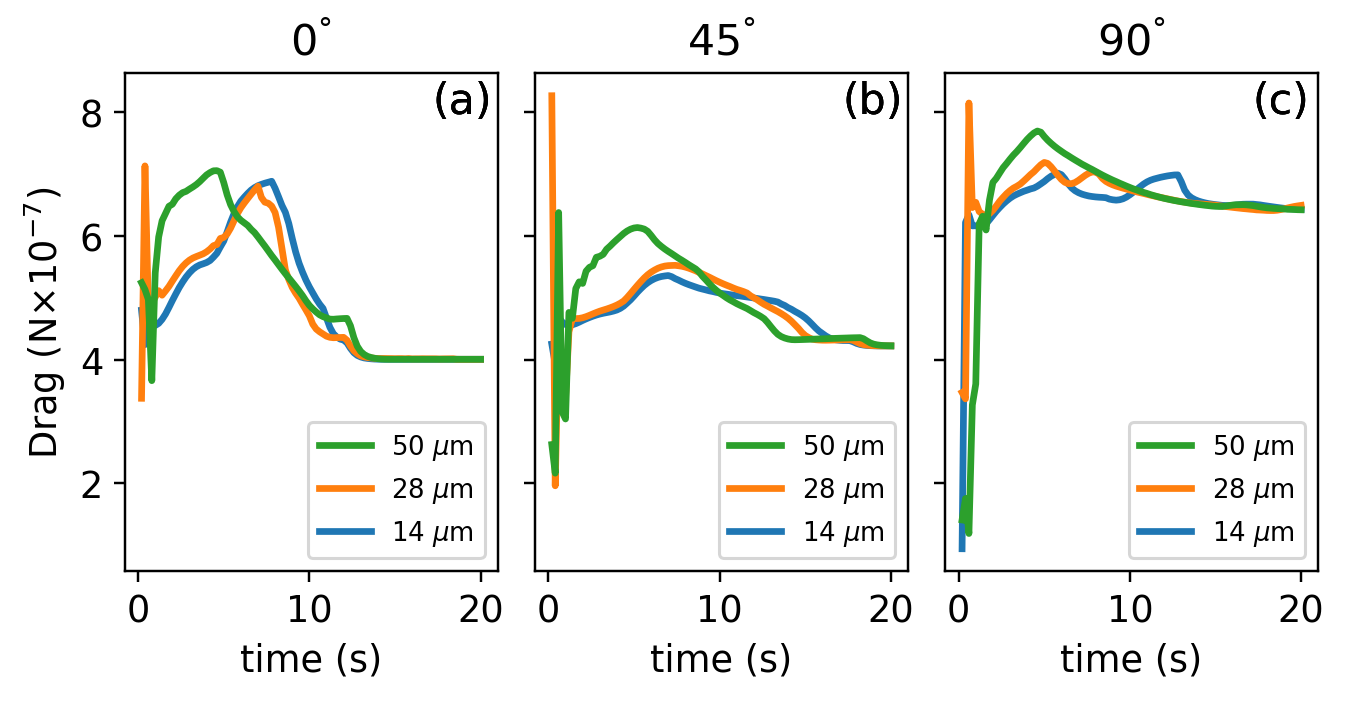

In [230]:
plot3x1DragcomparisonPlots(dragDataframes_parallelFlow, dragDataframes_angle45Flow, dragDataframes_perpendicularFlow, bf_thickness_labels, drag_angle_labels, "drag_vs_angle")

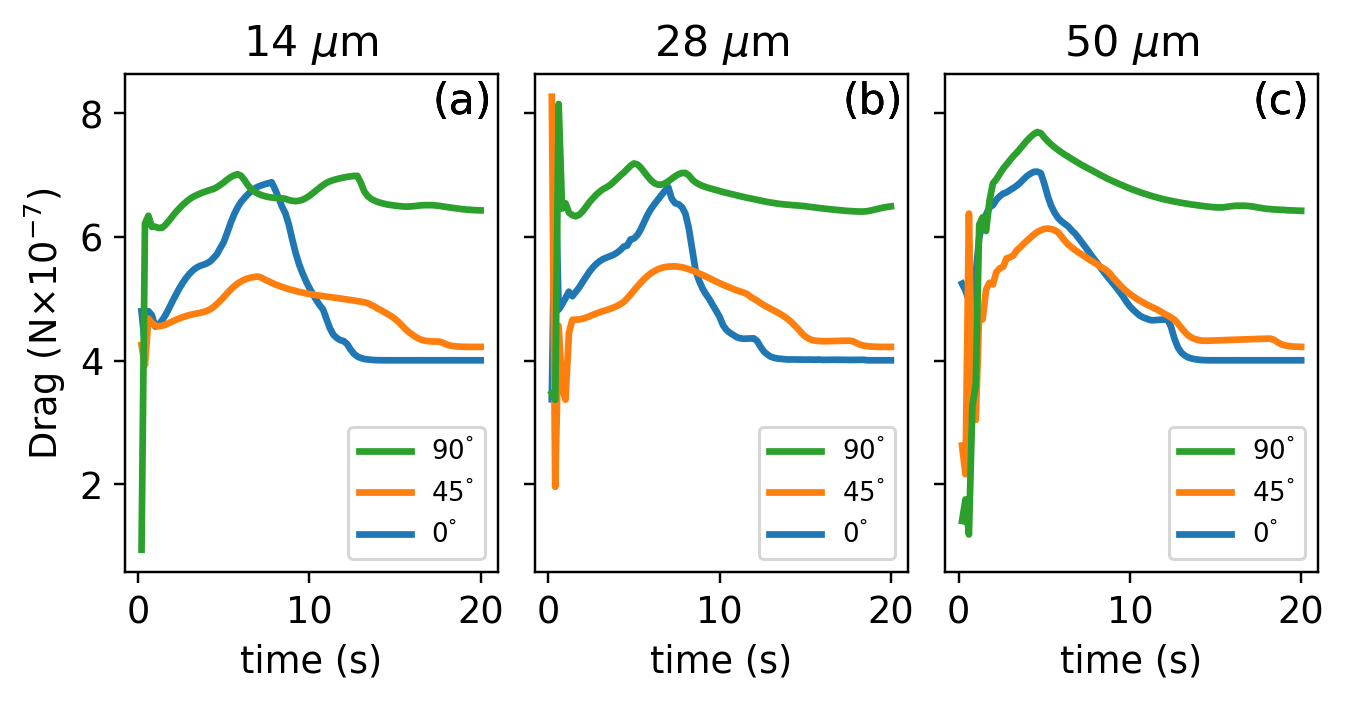

In [231]:
plot3x1DragcomparisonPlots(dragDataFrames_14microns, dragDataFrames_28microns, dragDataFrames_50microns, label_list=drag_angle_labels, title_list=bf_thickness_labels, filename="drag_vs_bfThickness")

In [232]:
def plot3x1AlphaComparisonPlots(df_group1, df_group2, df_group3, label_list, title_list, normalised, filename):
    '''
    same sort of method as the drag plots above but for the alpha (biofilm) plots.
    this method takes the argument "normalised" which is a boolean value which says whether we're doing the normalised alpha plots or not
    '''
    
    fig, axs = plt.subplots(1,3, dpi=220, sharey=True)
    fig.set_size_inches(7,3)
    
    labelSize=12
    titleSize=14
    
    if normalised:
        df_key = "alpha_normalised"
        y_label = "$\\alpha / \\alpha_\max$"
    else:
        df_key = "alpha.biofilm"
        y_label = "volume of $\\alpha$ (m$^3$ $\\times 10^{-11}$)"
    
    df_group_list = [df_group1, df_group2, df_group3]
    letters = list(string.ascii_lowercase)[:len(df_group_list)] #letters used for labelling subplots
    
    for ax, df_group_and_key, title, letter in zip(axs.flat, df_group_list, title_list, letters):
        
        for df, label in zip(df_group_and_key, label_list):
            
            ax.plot(df["t"], df[df_key], label=label, lw=2.2)
            
            ax.set_title(title, fontsize=titleSize)
            ax.set_ylabel(y_label, fontsize=labelSize)
            ax.set_xlabel("time (s)", fontsize=labelSize)
            ax.text(0.03, 0.03, "("+letter+")", transform=ax.transAxes, fontsize=14)
            
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.yaxis.offsetText.set_visible(False) #removes the sci notation factor from the plots (double check it's the correct value in the axis label)
            
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles[::-1], labels[::-1], fontsize=8.5, loc="upper right", framealpha=0.6)
            ax.label_outer()
    
    plt.subplots_adjust(wspace=0.1)

    plt.savefig("riblet_plots/"+filename+".pdf", bbox_inches="tight")
    plt.show()

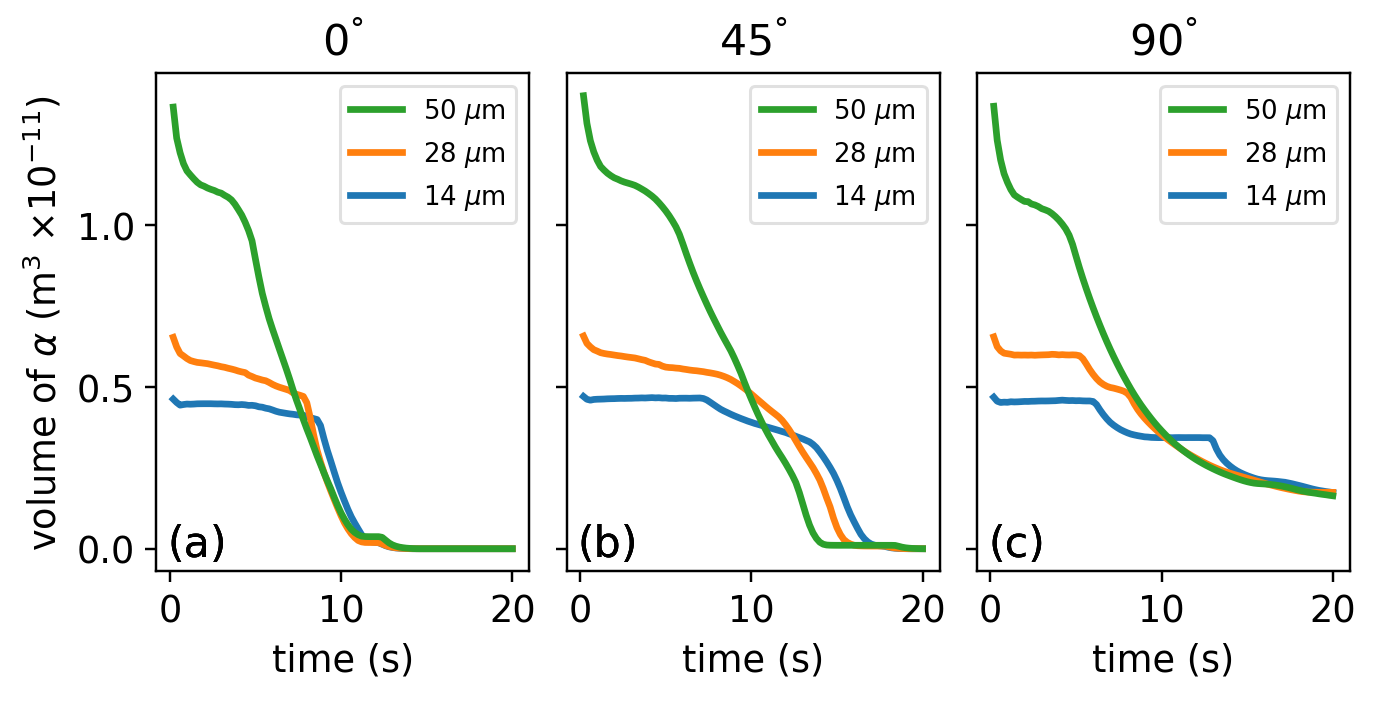

In [233]:
plot3x1AlphaComparisonPlots(alphaDataframes_parallelFlow, alphaDataframes_angle45Flow, alphaDataframes_perpendicularFlow, bf_thickness_labels, drag_angle_labels, 
                            normalised=False, filename="alpha_vs_angle")

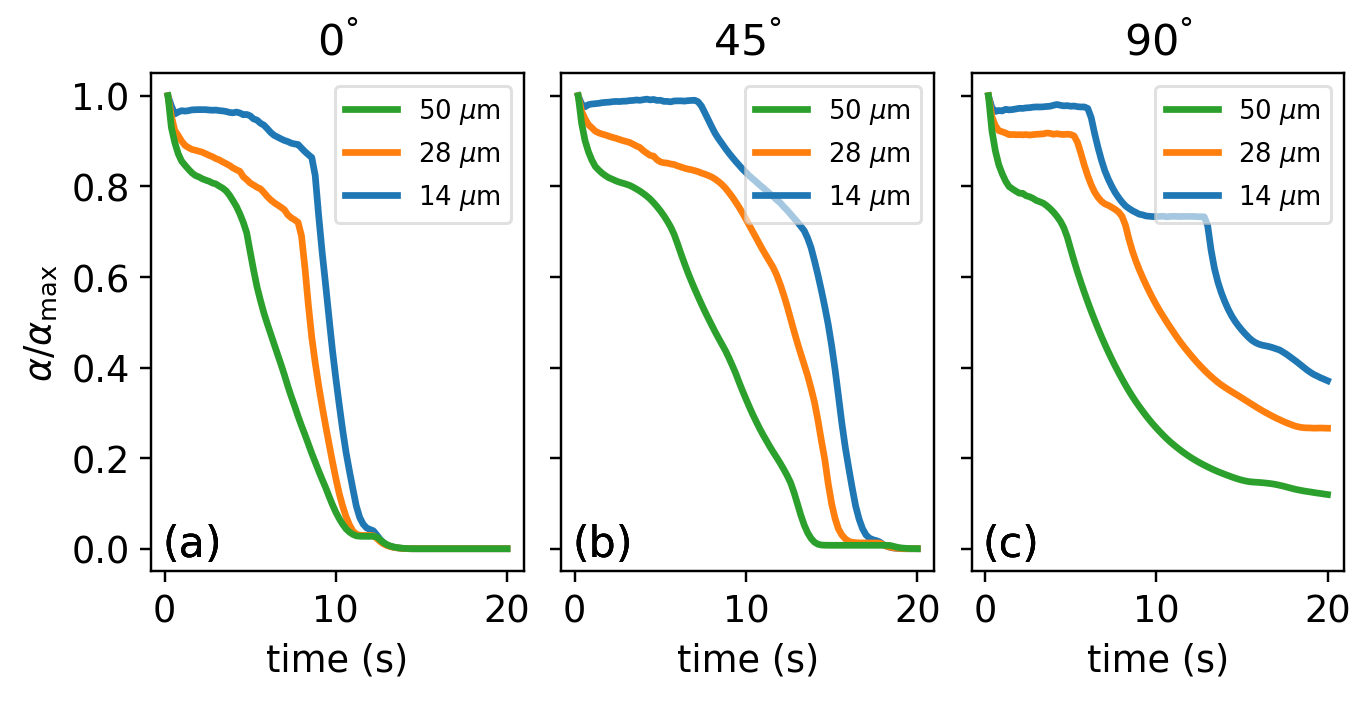

In [234]:
plot3x1AlphaComparisonPlots(alphaDataframes_parallelFlow, alphaDataframes_angle45Flow, alphaDataframes_perpendicularFlow, bf_thickness_labels, drag_angle_labels, 
                            normalised=True, filename="alpha_vs_angle_NORMALISED")

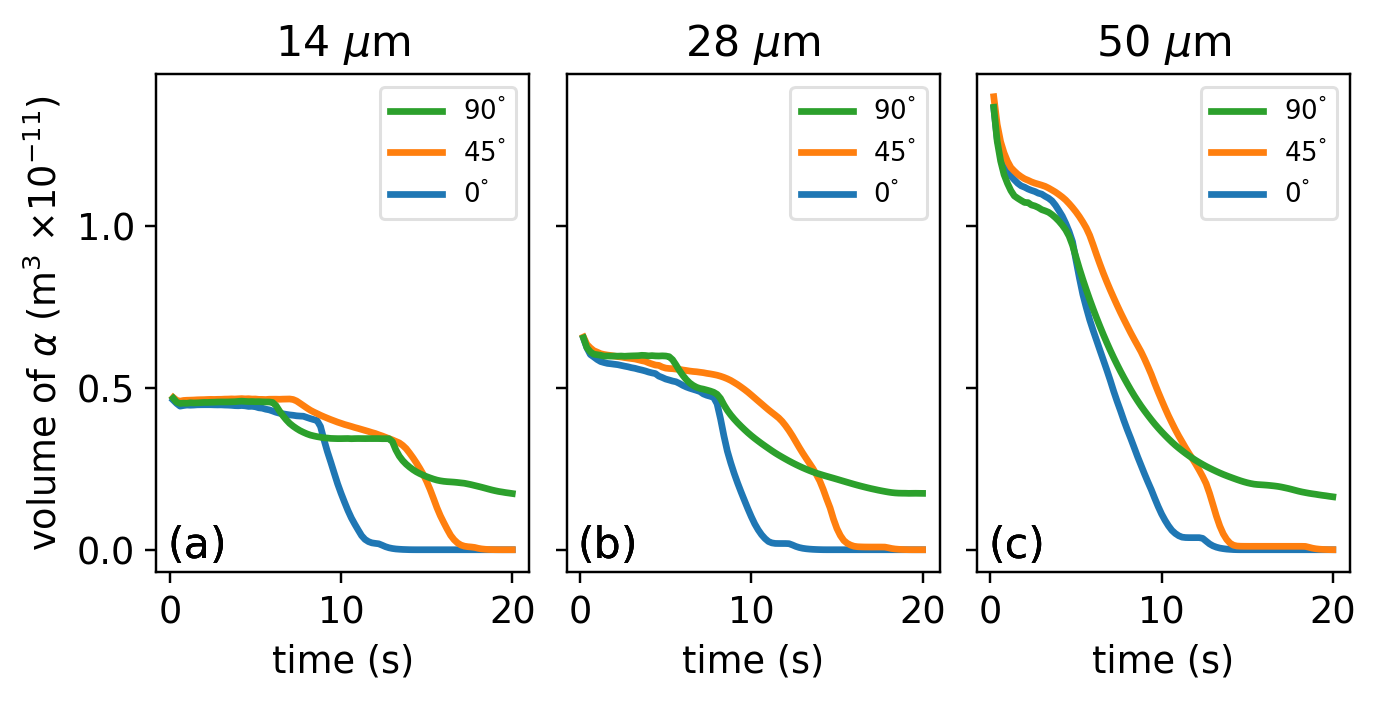

In [235]:
plot3x1AlphaComparisonPlots(alphaDataFrames_14microns, alphaDataFrames_28microns, alphaDataFrames_50microns, label_list=drag_angle_labels, title_list=bf_thickness_labels, 
                            normalised=False, filename="alpha_vs_thickness")

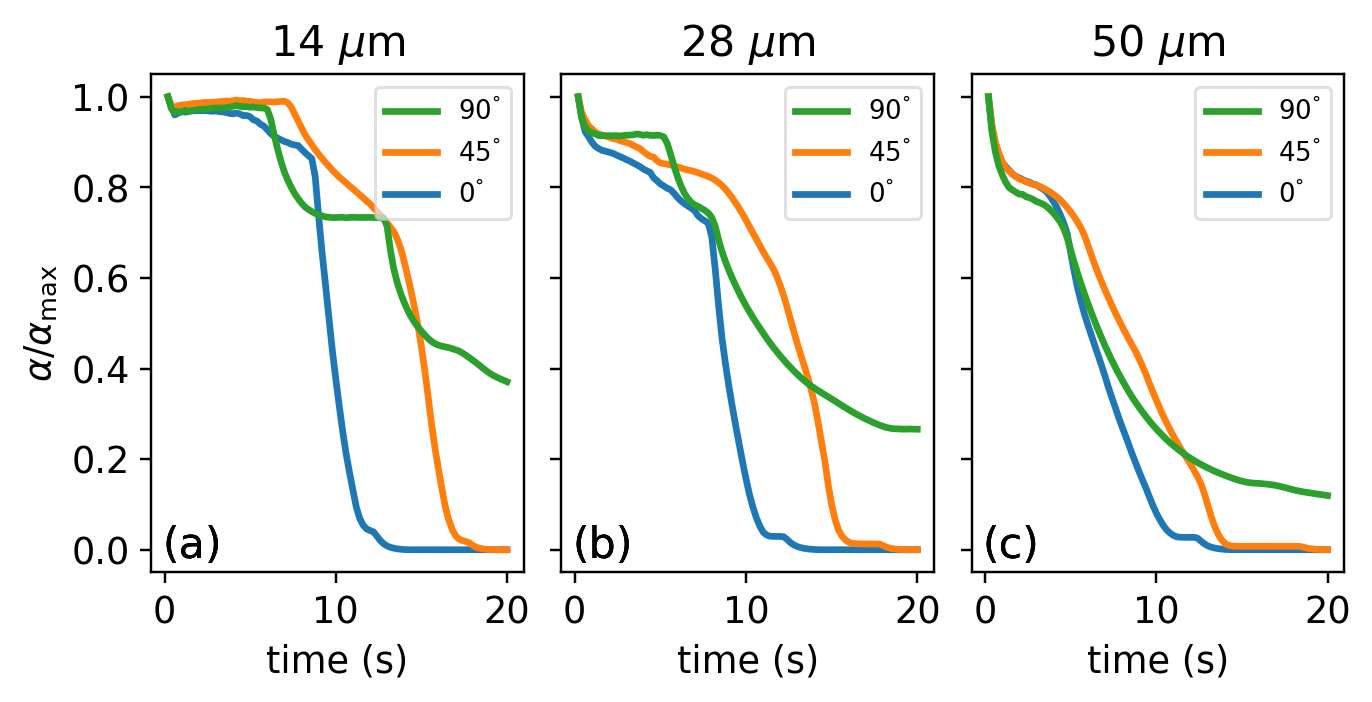

In [236]:
plot3x1AlphaComparisonPlots(alphaDataFrames_14microns, alphaDataFrames_28microns, alphaDataFrames_50microns, label_list=drag_angle_labels, title_list=bf_thickness_labels, 
                            normalised=True, filename="alpha_vs_thickness_NORMALISED")